In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import statsmodels.formula.api as smf

/home/akib/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sf=pd.read_csv("machine.data.csv",header=None)
sf.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
sf.columns=['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']


In [4]:
sf.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [5]:
sf.shape

(209, 10)

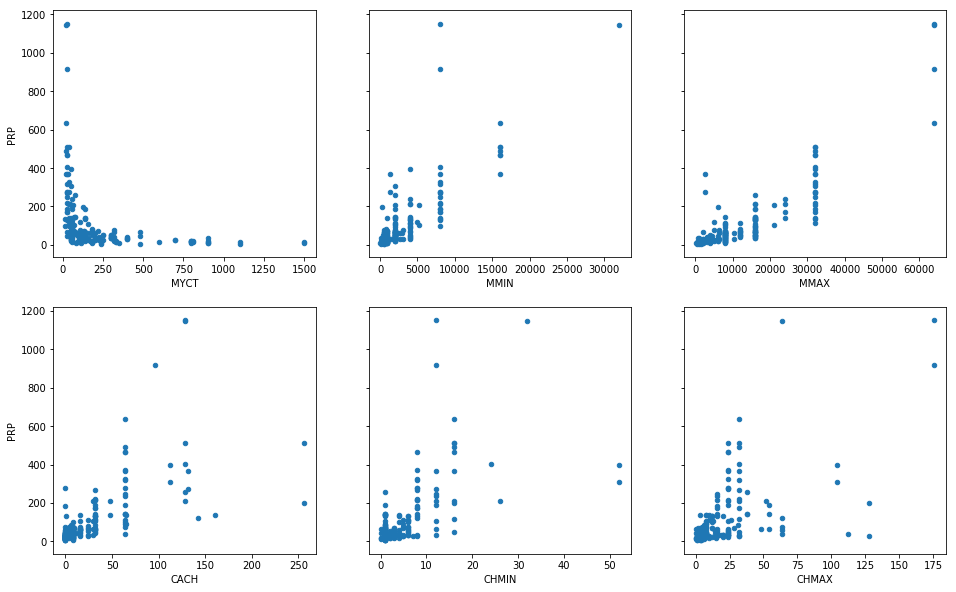

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
# attributes=sf2
fig, axs=plt.subplots(2,3,sharey=True)
sf.plot(kind='scatter',x='MYCT',y='PRP',ax=axs[0][0],figsize=(16,10))

sf.plot(kind='scatter',x='MMIN',y='PRP',ax=axs[0][1],figsize=(16,10))
sf.plot(kind='scatter',x='MMAX',y='PRP',ax=axs[0][2],figsize=(16,10))
sf.plot(kind='scatter',x='CACH',y='PRP',ax=axs[1][0],figsize=(16,10))
sf.plot(kind='scatter',x='CHMIN',y='PRP',ax=axs[1][1],figsize=(16,10))
sf.plot(kind='scatter',x='CHMAX',y='PRP',ax=axs[1][2],figsize=(16,10))
plt.savefig('matrix.png')

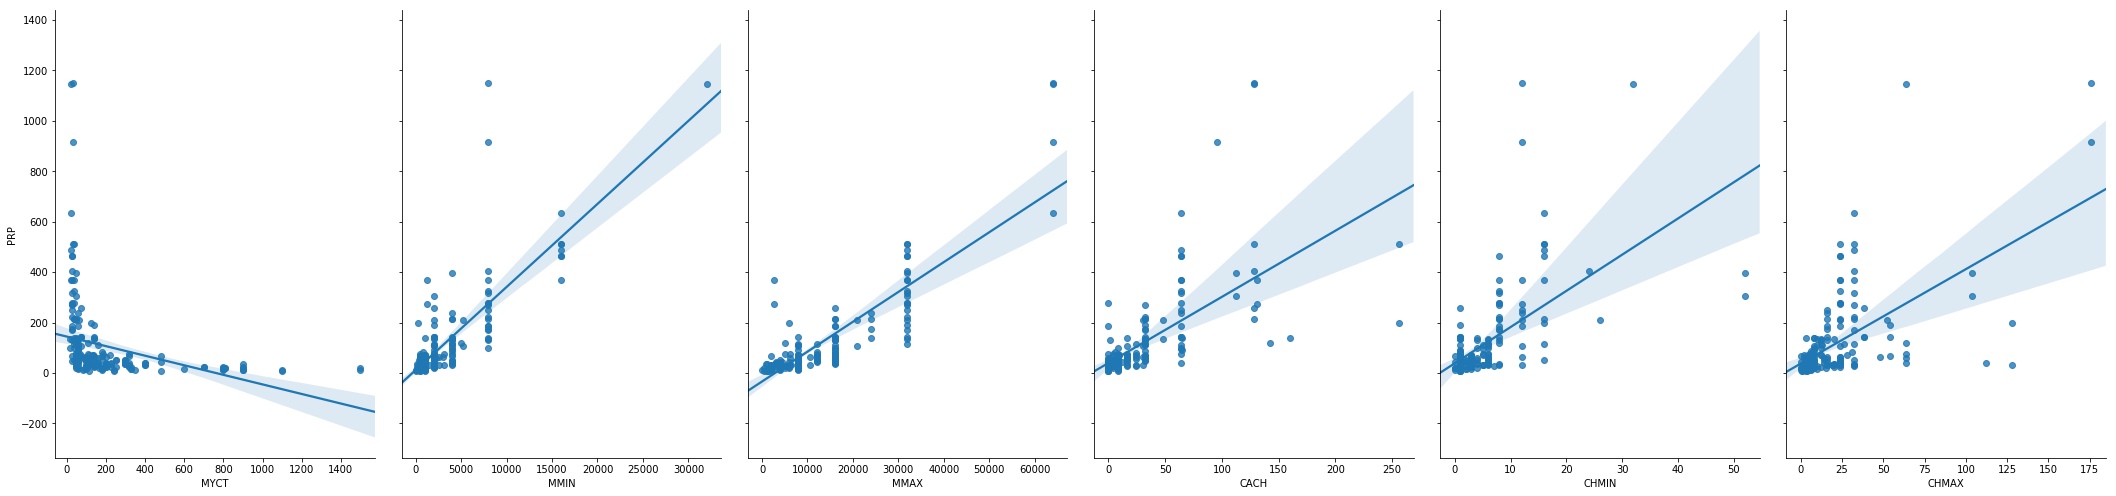

In [7]:
feature_cols=[ 'MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
sns.pairplot(sf, x_vars=feature_cols, y_vars='PRP', size=7, aspect=0.7, kind='reg')

In [8]:
y=sf['PRP']
feature_cols=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
X=sf[feature_cols]
X=sm.add_constant(X,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model1 = sm.OLS(y_train,X_train).fit()


In [9]:
model1.params

const   -20.122631
MYCT      0.018998
MMIN      0.012222
MMAX      0.003843
CACH      0.704588
CHMIN     3.413698
CHMAX     0.035058
dtype: float64

In [10]:
predict=model1.predict(X_train)
r2_score(y_train,predict)

0.8645702751936781

In [11]:
model1.rsquared_adj

0.8591167292283228

In [12]:
predict=model1.predict(X_test)
r2_score(y_test,predict)

0.7456539183392149

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     158.5
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           4.45e-62
Time:                        00:28:50   Log-Likelihood:                -792.50
No. Observations:                 156   AIC:                             1599.
Df Residuals:                     149   BIC:                             1620.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1226      6.882     -2.924      0.004     -33.721      -6.524
MYCT           0.0190      0.013      1.460      0.146      -0.007       0.045
MMIN           0.0122      0.002      7.013      0.000       0.009       0.016
MMAX           0.0038      0.001      7.354      0.000       0.003       0.005
CACH           0.7046      0.112      6.303      0.000       0.484       0.925
CHMIN          3.4137      0.793      4.303      0.000       1.846       4.981
CHMAX          0.0351      0.203      0.173      0.863      -0.366       0.437
==============================================================================
Omnibus:                       57.223   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.654
Skew:                           1.027   Prob(JB):                    3.13e-104
Kurtosis:                      11.313   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
sf.columns

Index([u'vendor name', u'Model Name', u'MYCT', u'MMIN', u'MMAX', u'CACH',
       u'CHMIN', u'CHMAX', u'PRP', u'ERP'],
      dtype='object')

In [15]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
#     print('I')
#     print(data.columns)
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    i=0
    while remaining and current_score == best_new_score :
        scores_with_candidates = []
        for candidate in remaining:
#             print(candidate)
            
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
#             print(selected)
            score = smf.ols(formula, data).fit().rsquared_adj
#             print(score)
            scores_with_candidates.append((score, candidate))
#             print(i)
            
#         print('df')
        scores_with_candidates.sort()
#         print('df')
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score <=best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
#         else :
#             i+=1
#         print(i)
#         i+=1
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
#     print('hi')
    model = smf.ols(formula, data).fit()
#     print('I')
#     print(i)
    return model
feature_cols1=[ 'MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
feature_cols2=[ 'MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']
X=sf[feature_cols2]
y=sf['PRP']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X_test=X_test[feature_cols1]


model1=forward_selected(X_train,'PRP')
predict=model1.predict(X_train)
print(r2_score(y_train,predict))
predict=model1.predict(X_test)
print(r2_score(y_test,predict))
model1.summary()


0.8645432178744953
0.7424646129940088


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     191.5
Date:                Thu, 15 Feb 2018   Prob (F-statistic):           3.10e-63
Time:                        00:28:50   Log-Likelihood:                -792.52
No. Observations:                 156   AIC:                             1597.
Df Residuals:                     150   BIC:                             1615.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.7651      6.541     -3.022      0.003     -32.690      -6.840
MMIN           0.0122      0.002      7.150      0.000       0.009       0.016
CACH           0.7103      0.106      6.676      0.000       0.500       0.921
MMAX           0.0038      0.001      7.408      0.000       0.003       0.005
CHMIN          3.4714      0.717      4.841      0.000       2.055       4.888
MYCT           0.0187      0.013      1.454      0.148      -0.007       0.044
==============================================================================
Omnibus:                       56.352   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.127
Skew:                           1.007   Prob(JB):                    3.67e-102
Kurtosis:                      11.235   Cond. No.                     3.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
sf.columns

Index([u'vendor name', u'Model Name', u'MYCT', u'MMIN', u'MMAX', u'CACH',
       u'CHMIN', u'CHMAX', u'PRP', u'ERP'],
      dtype='object')

In [ ]:
d=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
print(len(d))
feature_cols3=[]
for i in d:
    for j in d:
        s=i+"*"+j
#         print(s)
        feature_cols3+=[s]
        sf[s]=sf[i]*sf[j]
# print(feature_cols3)

6


In [ ]:
feature_cols1=[ 'MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
feature_cols4=feature_cols1+feature_cols3
# print(feature_cols4)
feature_cols2=[ 'MYCT','MMIN','MMAX','CACH','CHMIN','PRP','CHMAX']
feature_cols5=feature_cols2+feature_cols3
# print(feature_cols3)
X=sf[feature_cols5]
# X=sm.add_constant(X,1)
y=sf['PRP']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

X_test=X_test[feature_cols4]
# print('i')
# print(X_train.columns)
model2=forward_selected(X_train,'PRP')
# print('j')
pred=model2.predict(X_test)
print(r2_score(y_test,pred))
# print(feature_cols4)

In [ ]:
print(model2.summary())